<a href="https://colab.research.google.com/github/melhamdani/-Stamp-Prices/blob/main/project_6-Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition



* Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

* Load necessary packages.



https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Collection


In [ ]:
# Import required libraries
import urllib.request
import pandas as pd  # Import pandas for handling pickle files

# URLs of the files
url_x = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle"
url_y = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle"



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [ ]:

# Load pickled data
x_pickle_data = pd.read_pickle(url_x)
y_pickle_data = pd.read_pickle(url_y)

print("Pickle files loaded successfully!")


Pickle files loaded successfully!


In [ ]:
x_pickle_data = np.array(x_pickle_data)
y_pickle_data = np.array(y_pickle_data)

In [ ]:
type(x_pickle_data)
type(y_pickle_data)

numpy.ndarray

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [ ]:
x_pickle_data_scaled = x_pickle_data / 255
x_pickle_data.shape

(24946, 100, 100, 1)

In [ ]:
y_pickle_data.shape

(24946,)

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using plt.imshow().

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



In [ ]:
num_images = x_pickle_data_scaled.shape[0]
num_images
random_indices = np.random.choice(num_images, size=5, replace=False)
random_indices

array([ 2063,  9131, 11795,  4397, 15374])

In [ ]:
random_images = x_pickle_data_scaled[random_indices]
random_images.shape[:]


(5, 100, 100, 1)

In [ ]:
y = y_pickle_data[random_indices]
y = y.reshape(-1, 1)
y.shape

(5, 1)

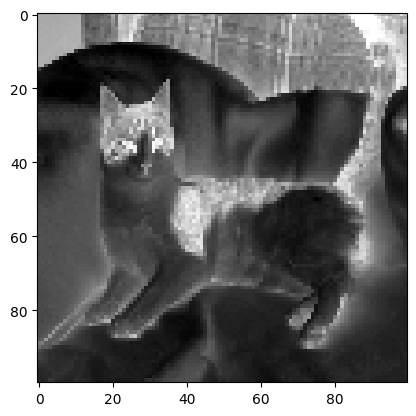

[1]


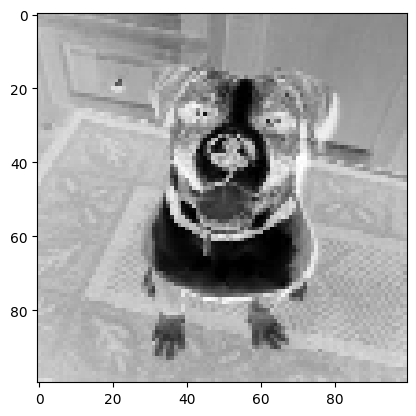

[0]


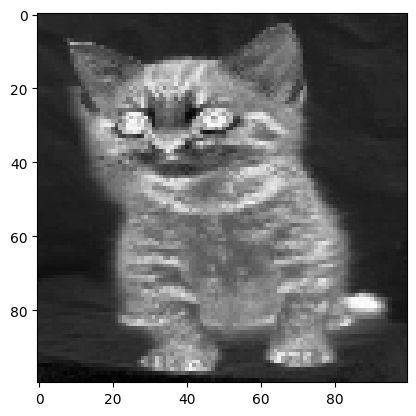

[1]


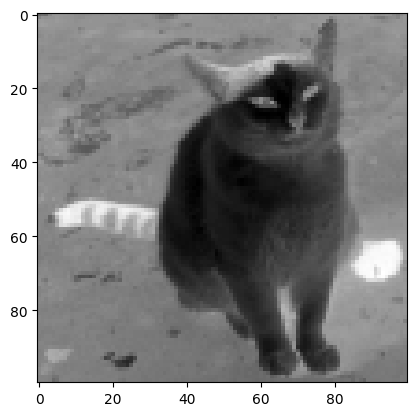

[1]


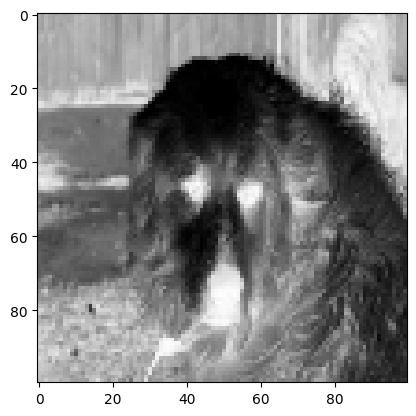

[0]


In [ ]:
for i in range(5):
    plt.imshow(random_images[i],cmap=plt.cm.gray_r)
    plt.show()
    print(y[i])


In [ ]:
print(y[0])
print(y[1])
print(y[2])
print(y[3])
print(y[4])

[1]
[0]
[1]
[1]
[0]


## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



Start the model as a feed forward (sequential) model.

In [ ]:
model = Sequential()

In [ ]:
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(100, 100, 1),
    )
)
model.add(
    MaxPooling2D(
        pool_size=(2, 2),
    )
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Flatten data to be used in output layer
model.add(
    Flatten()
)


### Compile model

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

### Fitting a convolutional neural network

### Fit model

In [ ]:
#fit mo
x_train, x_test, y_train, y_test = train_test_split(x_pickle_data_scaled, y_pickle_data, test_size=0.2, random_state=42)
x_train.shape


(19956, 100, 100, 1)

In [ ]:
#model.fit(X_train, y_train, epochs=12) ;

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 98, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 76832)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

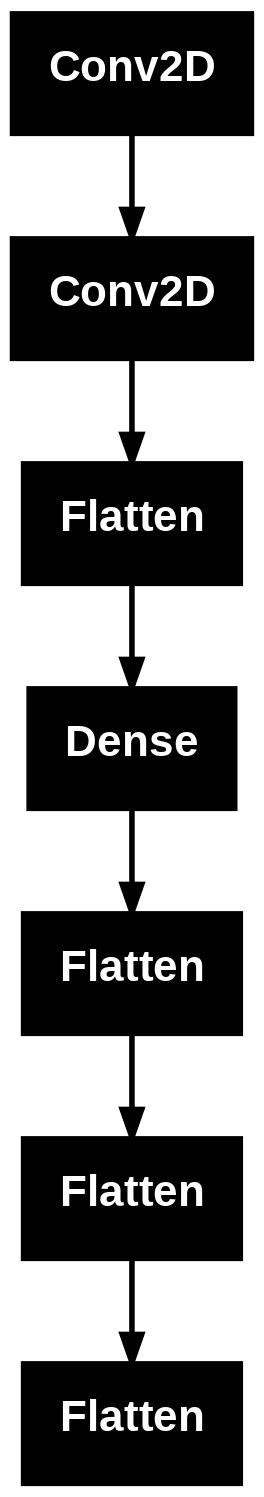

In [ ]:
plot_model(model)

In [ ]:
x_train.shape

(19956, 100, 100, 1)

In [ ]:
# Change test set to 4-D
#x_test2 = x_test.reshape( x_test.shape + (1,) )

x_test2 = x_test.reshape(x_test.shape[0], 100, 100, 1)
# Evaluate model



In [ ]:
# make predictions based on testing set
predictions = model.predict(x_test2)

156/156 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step


In [ ]:
predictions.shape

(4990, 76832)

Streaming output truncated to the last 5000 lines.
71834: 3.47
71835: 0.00
71836: 0.00
71837: 37.53
71838: 0.00
71839: 0.00
71840: 0.00
71841: 0.00
71842: 13.31
71843: 5.27
71844: 0.00
71845: 7.63
71846: 18.64
71847: 18.09
71848: 21.20
71849: 14.17
71850: 22.61
71851: 33.63
71852: 0.00
71853: 0.00
71854: 0.00
71855: 19.65
71856: 0.00
71857: 0.00
71858: 51.49
71859: 0.00
71860: 0.00
71861: 30.98
71862: 24.42
71863: 0.00
71864: 48.73
71865: 0.00
71866: 2.97
71867: 0.00
71868: 0.00
71869: 37.60
71870: 0.00
71871: 0.00
71872: 0.00
71873: 0.00
71874: 13.36
71875: 5.23
71876: 0.00
71877: 9.11
71878: 18.62
71879: 19.16
71880: 21.28
71881: 14.45
71882: 22.35
71883: 32.98
71884: 0.00
71885: 0.00
71886: 0.00
71887: 19.96
71888: 0.00
71889: 0.00
71890: 51.31
71891: 0.00
71892: 0.00
71893: 30.38
71894: 24.41
71895: 0.00
71896: 48.61
71897: 0.00
71898: 3.43
71899: 0.00
71900: 0.00
71901: 37.14
71902: 0.00
71903: 0.00
71904: 0.00
71905: 0.00
71906: 13.26
71907: 5.25
71908: 0.00
71909: 8.77
71910: 18

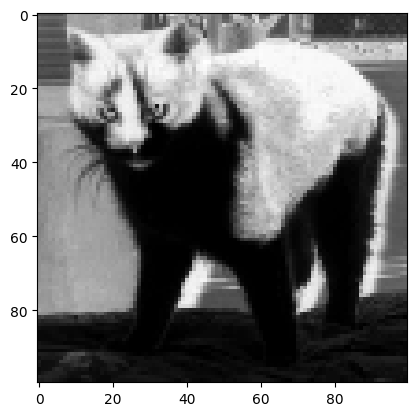

In [ ]:
i = 1
for k, x in enumerate(predictions[i] * 100):
    print(f"{k}: {x:.2f}")  # Ensure `x` is a scalar
print(np.argmax(predictions[i]))
print(y_test[i])
plt.imshow(x_test[i], cmap=plt.cm.gray_r)
plt.show()



## Communication of Results



* Communicate the results of your analysis.



In [ ]:
cm = tf.math.confusion_matrix(y_test, predictions)
cm = cm.numpy()
cm

## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.